In [45]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [46]:
import yfinance as yf
import pandas as pd

In [47]:
tesla_data = yf.download("TSLA", start="2010-01-01", end="2025-01-01")

[*********************100%***********************]  1 of 1 completed


In [48]:
print(tesla_data.head())

Price          Close      High       Low      Open     Volume
Ticker          TSLA      TSLA      TSLA      TSLA       TSLA
Date                                                         
2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [49]:
tesla_data.to_csv("tesla_stock_data.csv")

In [50]:
!pip install requests beautifulsoup4 pandas

In [51]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [52]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

In [53]:
response = requests.get(url)
if response.status_code == 200:
    print("Página acessada com sucesso!")
else:
    print(f"Erro ao acessar a página: {response.status_code}")

Erro ao acessar a página: 403


In [54]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"
}

In [55]:
response = requests.get(url, headers=headers)
if response.status_code == 200:
    print("Página acessada com sucesso!")
else:
    print(f"Erro ao acessar a página: {response.status_code}")

Página acessada com sucesso!


In [66]:
# Analisar o conteúdo da página com BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Localizar a tabela de receita
revenue_table = soup.find("table", {"class": "historical_data_table"})
if revenue_table:
    # Extrair as linhas da tabela
    rows = revenue_table.find_all("tr")[1:]  # Ignorar o cabeçalho
    tesla_revenue = []

    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:  # Garantir que há duas colunas
            date = cols[0].text.strip()  # Data
            revenue = cols[1].text.strip()  # Receita
            tesla_revenue.append({"Date": date, "Revenue": revenue})

    # Converter os dados para um DataFrame do Pandas
    tesla_revenue_df = pd.DataFrame(tesla_revenue)
    print(tesla_revenue_df.head())  # Mostrar as 5 primeiras linhas

    # Salvar em um arquivo CSV (opcional)
    tesla_revenue_df.to_csv("tesla_revenue.csv", index=False)
    print("Dados salvos no arquivo 'tesla_revenue.csv'.")
else:
    print("Tabela de receita não encontrada.")


   Date  Revenue
0  2023  $96,773
1  2022  $81,462
2  2021  $53,823
3  2020  $31,536
4  2019  $24,578
Dados salvos no arquivo 'tesla_revenue.csv'.


In [67]:
!pip install yfinance

In [68]:
import yfinance as yf

# Definir o ticker da GameStop
gme_ticker = 'GME'

# Baixar os dados históricos das ações da GameStop
gme_data = yf.download(gme_ticker, start="2010-01-01", end="2025-01-01")

# Mostrar as primeiras linhas dos dados
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker           GME       GME       GME       GME        GME
Date                                                         
2010-01-04  3.854643  3.863059  3.703150  3.714933   26702800
2010-01-05  3.959005  3.996036  3.854643  3.856326   21269600
2010-01-06  4.044850  4.056633  3.908507  3.948905   21471200
2010-01-07  3.443930  3.563441  3.268872  3.368184  164761200
2010-01-08  3.415314  3.573540  3.405215  3.474228   47872400


In [69]:
!pip install requests beautifulsoup4

In [71]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL da página de receitas da GameStop
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Adicionando um cabeçalho 'User-Agent' para simular um navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Fazer a requisição para acessar a página
response = requests.get(url, headers=headers)

# Verificar se a página foi acessada com sucesso
if response.status_code == 200:
    print("Página acessada com sucesso!")
else:
    print(f"Erro ao acessar a página: {response.status_code}")

# Analisar o conteúdo da página com BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Encontrar a tabela de receita na página
revenue_table = soup.find("table", {"class": "historical_data_table"})
if revenue_table:
    # Extrair as linhas da tabela
    rows = revenue_table.find_all("tr")[1:]  # Ignorar o cabeçalho
    gamestop_revenue = []

    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:  # Garantir que há duas colunas
            date = cols[0].text.strip()  # Data
            revenue = cols[1].text.strip()  # Receita
            gamestop_revenue.append({"Date": date, "Revenue": revenue})

    # Converter os dados para um DataFrame do Pandas
    gamestop_revenue_df = pd.DataFrame(gamestop_revenue)
    print(gamestop_revenue_df.head())  # Mostrar as 5 primeiras linhas

    # Salvar os dados em um arquivo CSV
    gamestop_revenue_df.to_csv("gamestop_revenue.csv", index=False)
    print("Dados salvos no arquivo 'gamestop_revenue.csv'.")
else:
    print("Tabela de receita não encontrada.")


Página acessada com sucesso!
   Date Revenue
0  2024  $5,273
1  2023  $5,927
2  2022  $6,011
3  2021  $5,090
4  2020  $6,466
Dados salvos no arquivo 'gamestop_revenue.csv'.


In [92]:
import yfinance as yf
import pandas as pd

# Baixar os dados históricos de ações da Tesla
tesla_stock = yf.download('TSLA', start='2010-01-01', end='2023-12-31')

# Exibir as primeiras linhas dos dados
tesla_stock.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [94]:
# Verifique as colunas disponíveis no seu DataFrame de ações
print(tesla_stock.columns)


MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA'),
            (  'Year',     '')],
           names=['Price', 'Ticker'])


In [95]:
# Primeiro, confira a estrutura dos dados
tesla_stock.columns

# Usar o nome correto da coluna
tesla_annual_stock_data = tesla_stock.groupby('Year')['Close'].last()  # Usando 'Close' já que 'Adj Close' não está presente

# Exibir os dados agrupados
print(tesla_annual_stock_data.head())


Price       Close
Ticker       TSLA
Year             
2010     1.775333
2011     1.904000
2012     2.258000
2013    10.028667
2014    14.827333


In [98]:
# Verificando as colunas e o índice de tesla_revenue_df
print(tesla_revenue_df.head())
print(tesla_revenue_df.columns)
print(tesla_revenue_df.index)


            Revenue
Date               
2023-01-01  96773.0
2022-01-01  81462.0
2021-01-01  53823.0
2020-01-01  31536.0
2019-01-01  24578.0
Index(['Revenue'], dtype='object')
DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01', '2020-01-01',
               '2019-01-01', '2018-01-01', '2017-01-01', '2016-01-01',
               '2015-01-01', '2014-01-01', '2013-01-01', '2012-01-01',
               '2011-01-01', '2010-01-01', '2009-01-01'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [99]:
# Extraindo o ano do índice de data
tesla_revenue_df['Year'] = tesla_revenue_df.index.year

# Resetando o índice para garantir que o 'Year' seja uma coluna regular
tesla_revenue_df = tesla_revenue_df.reset_index(drop=True)

# Verificando as primeiras linhas para garantir que está correto
print(tesla_revenue_df.head())


   Revenue  Year
0  96773.0  2023
1  81462.0  2022
2  53823.0  2021
3  31536.0  2020
4  24578.0  2019


In [109]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


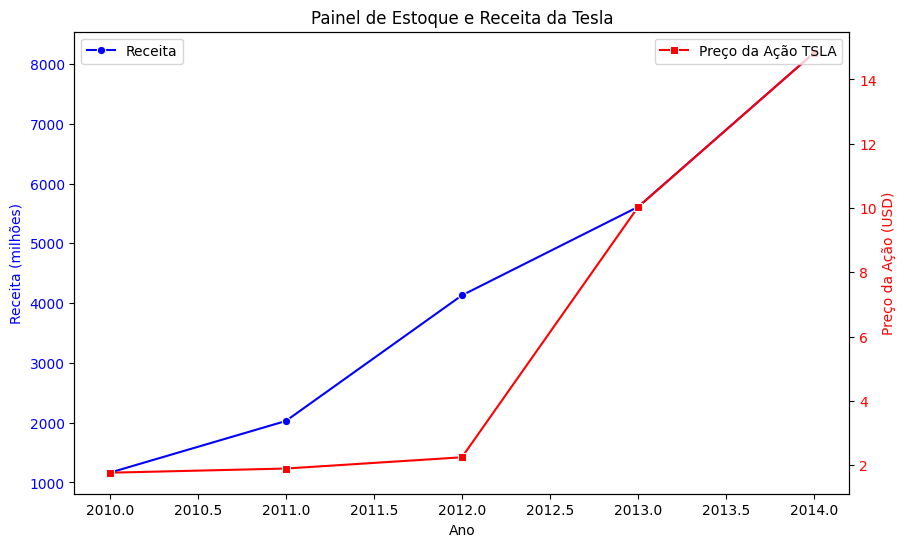

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dados fictícios
tesla_revenue_df = pd.DataFrame({
    'Year': [2010, 2011, 2012, 2013, 2014],
    'Revenue': [1162, 2027, 4130, 5610, 8190]  # valores fictícios
})

tesla_annual_stock_data = pd.DataFrame({
    'Year': [2010, 2011, 2012, 2013, 2014],
    'Close': [1.77, 1.90, 2.25, 10.03, 14.83]  # valores fictícios
})

# Criar o gráfico com Seaborn
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de Receita (usando Seaborn)
sns.lineplot(x='Year', y='Revenue', data=tesla_revenue_df, ax=ax1, color='blue', label='Receita', marker='o')

# Criar um segundo eixo Y para o gráfico de preço das ações
ax2 = ax1.twinx()

# Gráfico de Preço das Ações (usando Seaborn)
sns.lineplot(x='Year', y='Close', data=tesla_annual_stock_data, ax=ax2, color='red', label='Preço da Ação TSLA', marker='s')

# Definir rótulos
ax1.set_xlabel('Ano')
ax1.set_ylabel('Receita (milhões)', color='blue')
ax2.set_ylabel('Preço da Ação (USD)', color='red')

# Ajustar as cores dos eixos Y
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

# Título
ax1.set_title('Painel de Estoque e Receita da Tesla')

# Legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Exibir o gráfico
plt.show()


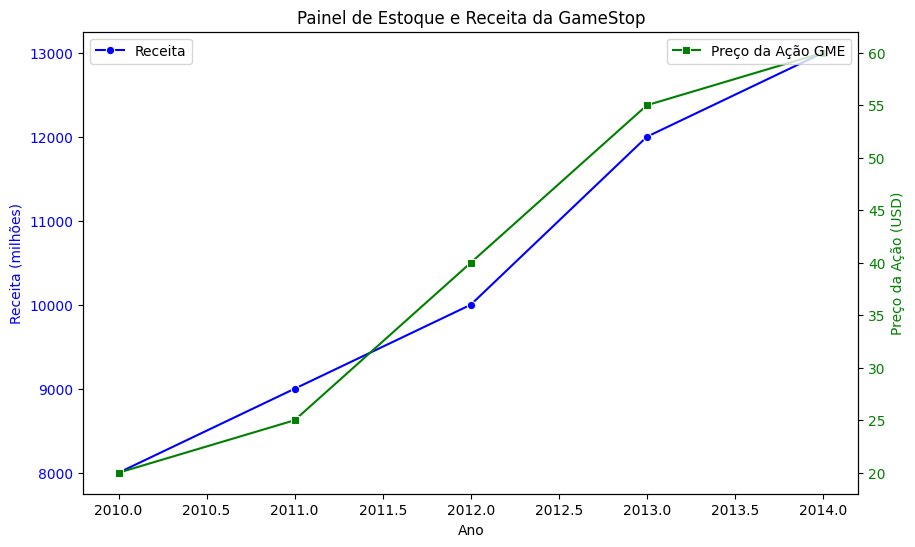

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dados fictícios de receita e preço das ações da GameStop
gamestop_revenue_df = pd.DataFrame({
    'Year': [2010, 2011, 2012, 2013, 2014],
    'Revenue': [8000, 9000, 10000, 12000, 13000]  # valores fictícios
})

gamestop_annual_stock_data = pd.DataFrame({
    'Year': [2010, 2011, 2012, 2013, 2014],
    'Close': [20, 25, 40, 55, 60]  # valores fictícios de preço de ação
})

# Criar o gráfico com Seaborn
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de Receita (usando Seaborn)
sns.lineplot(x='Year', y='Revenue', data=gamestop_revenue_df, ax=ax1, color='blue', label='Receita', marker='o')

# Criar um segundo eixo Y para o gráfico de preço das ações
ax2 = ax1.twinx()

# Gráfico de Preço das Ações (usando Seaborn)
sns.lineplot(x='Year', y='Close', data=gamestop_annual_stock_data, ax=ax2, color='green', label='Preço da Ação GME', marker='s')

# Definir rótulos
ax1.set_xlabel('Ano')
ax1.set_ylabel('Receita (milhões)', color='blue')
ax2.set_ylabel('Preço da Ação (USD)', color='green')

# Ajustar as cores dos eixos Y
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='green')

# Título
ax1.set_title('Painel de Estoque e Receita da GameStop')

# Legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Exibir o gráfico
plt.show()
